In [18]:
import pandas as pd
import talib as tb
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)

In [47]:
data_file = "snp500.csv"

In [48]:
data = pd.read_csv("../data/{}".format(data_file))
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head(10)

,timestamp,open,high,low,close,price,volume
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,16.760000,2970000
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,16.670000,3330000
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,16.719999,1460000


In [49]:
start_date = pd.Timestamp(2010, 1, 1)
data = data[data['timestamp'] >= start_date].reset_index(drop=True)
data.set_index("timestamp", inplace=True)
data.head(10)

,open,high,low,close,price,volume
timestamp,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000


In [50]:
data['SMA_21'] = data['price'].rolling(21).mean()
data['SMA_90'] = data['price'].rolling(90).mean()

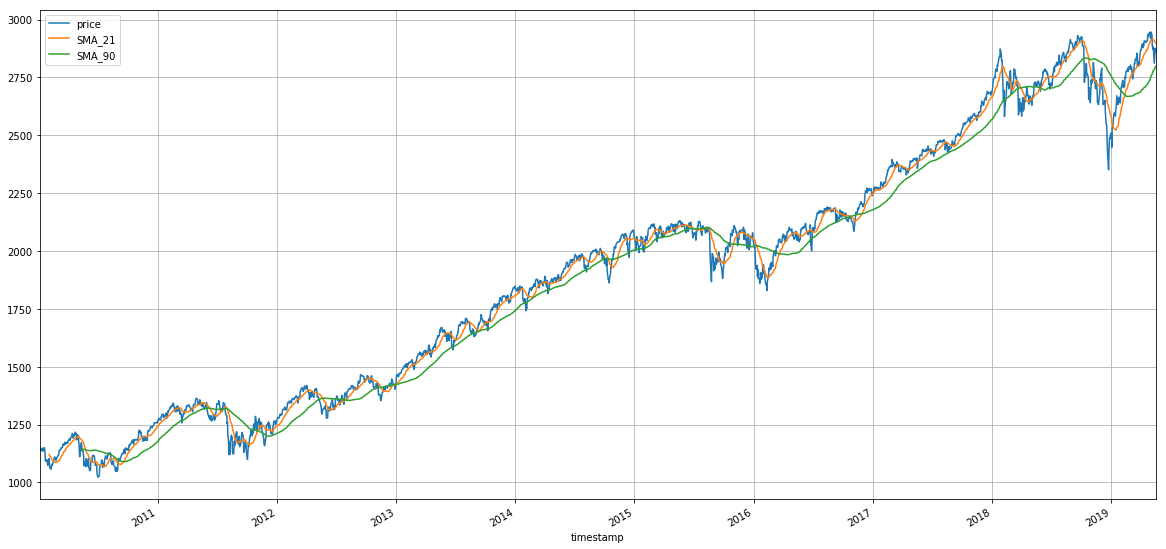

In [51]:
data[['price', 'SMA_21', 'SMA_90']].plot(grid=True)

In [52]:
# clear initial windows
data.dropna(inplace=True)

In [53]:
# SMA strategy
tradelog = []
init_cap = 1e6
commission = 2
side = None
for it, row in data.iterrows():
    if row['SMA_21'] > row['SMA_90']:
        if side != "BUY":
            side = "BUY"
            price = row['price']
            size += init_cap / price
            trade_string = "{},SPX,BUY,{},{},{}".format(it, size, price, commission)
            print(trade_string)
            tradelog.append(trade_string.split(","))
    else:
        if side != "SELL":
            side = "SELL"
            price = row['price']
            size += init_cap / price
            trade_string = "{},SPX,SELL,{},{},{}".format(it, size, price, commission)
            print(trade_string)
            tradelog.append(trade_string.split(","))
if side == "BUY":
    price = row['price']
    trade_string = "{},SPX,SELL,{},{},{}".format(it, size, price, commission)
    print(trade_string)
    tradelog.append(trade_string.split(","))
else:
    price = row['price']
    trade_string = "{},SPX,BUY,{},{},{}".format(it, size, price, commission)
    print(trade_string)
    tradelog.append(trade_string.split(","))

2010-05-12 00:00:00,SPX,BUY,1216.7187434676825,1171.670044,2
2010-05-26 00:00:00,SPX,SELL,2153.092212152827,1067.949951,2
2010-09-20 00:00:00,SPX,BUY,3028.204912776253,1142.709961,2
2011-06-09 00:00:00,SPX,SELL,3804.0001028460747,1289.0,2
2011-07-22 00:00:00,SPX,BUY,4547.483460067776,1345.02002,2
2011-08-03 00:00:00,SPX,SELL,5340.920173158567,1260.339966,2
2011-11-03 00:00:00,SPX,BUY,6133.847248423009,1261.150024,2
2012-05-21 00:00:00,SPX,SELL,6893.731447846137,1315.98999,2
2012-07-27 00:00:00,SPX,BUY,7615.247801680616,1385.969971,2
2012-11-15 00:00:00,SPX,SELL,8354.16590185751,1353.329956,2
2013-01-02 00:00:00,SPX,BUY,9037.963969384544,1462.420044,2
2014-10-14 00:00:00,SPX,SELL,9570.530420945366,1877.699951,2
2014-11-12 00:00:00,SPX,BUY,10061.147371761017,2038.25,2
2015-07-02 00:00:00,SPX,SELL,10542.662017528059,2076.780029,2
2015-08-06 00:00:00,SPX,BUY,11022.60978561877,2083.560059,2
2015-08-13 00:00:00,SPX,SELL,11502.596754625343,2083.389893,2
2015-10-30 00:00:00,SPX,BUY,11983.51393

In [54]:
tradelog_df = pd.DataFrame(tradelog, columns=['timestamp', 'ticker', 'side', 'size', 'price', 'commission'])
tradelog_df.head(10)

,timestamp,ticker,side,size,price,commission
0,2010-05-12 00:00:00,SPX,BUY,1216.7187434676825,1171.670044,2
1,2010-05-26 00:00:00,SPX,SELL,2153.092212152827,1067.949951,2
2,2010-09-20 00:00:00,SPX,BUY,3028.204912776253,1142.709961,2
3,2011-06-09 00:00:00,SPX,SELL,3804.0001028460747,1289.0,2
4,2011-07-22 00:00:00,SPX,BUY,4547.483460067776,1345.02002,2
5,2011-08-03 00:00:00,SPX,SELL,5340.920173158567,1260.339966,2
6,2011-11-03 00:00:00,SPX,BUY,6133.847248423009,1261.150024,2
7,2012-05-21 00:00:00,SPX,SELL,6893.731447846137,1315.98999,2
8,2012-07-27 00:00:00,SPX,BUY,7615.247801680616,1385.969971,2
9,2012-11-15 00:00:00,SPX,SELL,8354.16590185751,1353.329956,2


In [55]:
tradelog_df.to_csv("../data/tradelog_{}".format(data_file), index=False)